# Plotting with Altair
[Altair](https://altair-viz.github.io/) is a fantastic plotting library that uses descriptive plotting grammer and has built-in tools for interactivity. I'm using some example data here because Altair has trouble with larger datasets.

Be sure to check out the [wonderful Altair examples](https://altair-viz.github.io/gallery/index.html) for more ideas.

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data

# uncomment this line if running in a notebook instead of jupyterlab
# alt.renderers.enable('notebook')

In [2]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## Understanding data types
Keep in mind [four main types of data](https://altair-viz.github.io/user_guide/encoding.html#data-types) for every variable/parameter in a visualization. Altair understands and uses these data types.

Data Type | Description
----------|------------
Quantitative | a continuous real-valued quantity
Ordinal | a discrete ordered quantity
Nominal | a discrete unordered category
Temporal | a time or date value

There can be more than one appropriate type for a data series, depending on the context. 

Understanding the type of data you have will help determne what plots to make or color palettes to use.

## Basic plots
To create a plot we start with a `Chart` object. Next we specify a type of *mark* (e.g. `mark_point`, `mark_circle`, `mark_line`, `mark_bar`, etc). Finally we *encode* information like the name of x and y variables in channels.

Notice that the data types for each variable are specified below. These aren't always necessary - Altair will try to infer them - but they can affect the type of plot that is created.

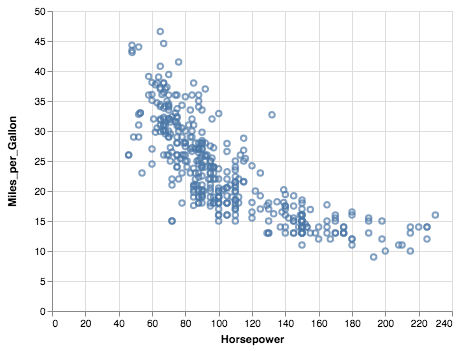

In [3]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q'
)

### Interactivity
It's easy to add interactivity like tooltips and drag/zooom.

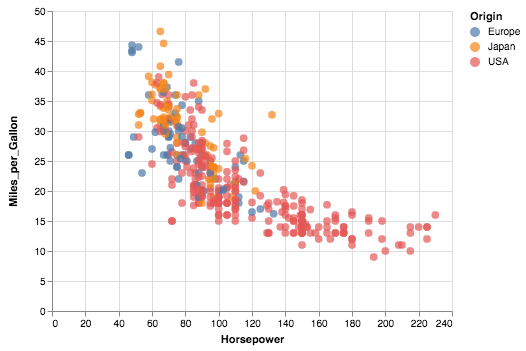

In [4]:
alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

### Changing data types
By changing the `color` from *Nominal* to *Ordinal* I have forced Altair to pick a different type of color palette.

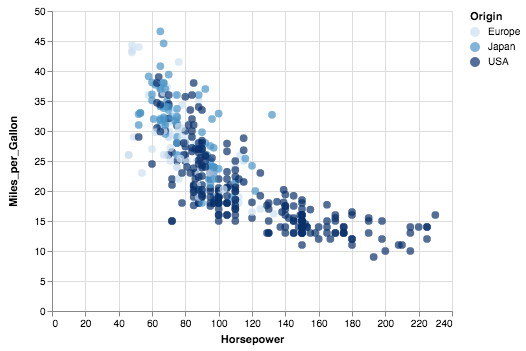

In [5]:
# Changing color from a Nominal to an Ordinal variable changes the color palette
alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:O',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

Using a *Nominal* data type for the *color* channel will produce a different type of legend.

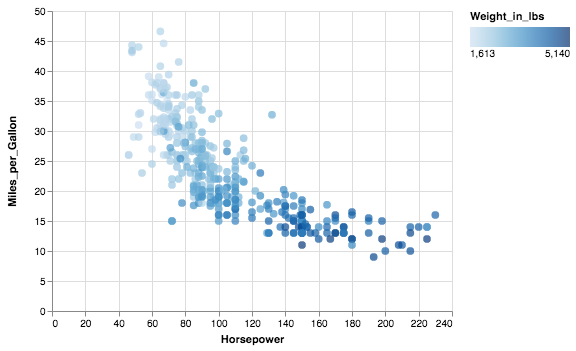

In [6]:
alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Weight_in_lbs',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
)

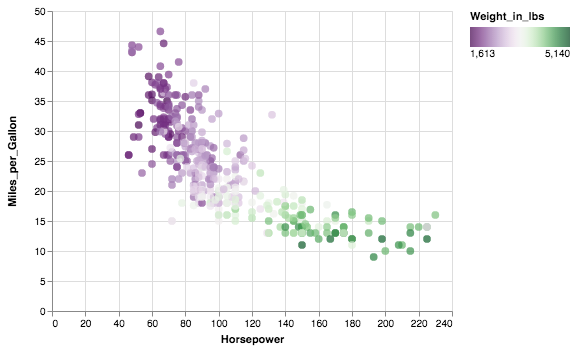

In [7]:
# A diverging color palette doesn't make much sense here
alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.Color('Weight_in_lbs', scale=alt.Scale(scheme='purplegreen')),
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
)

### Aggregated statistics

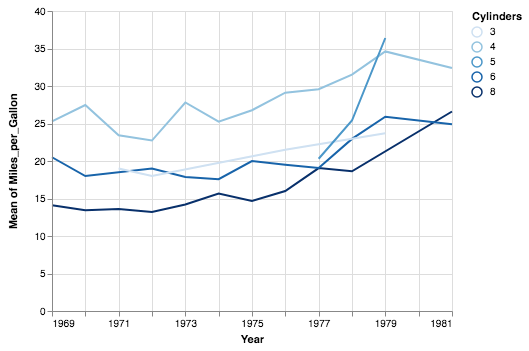

In [8]:
# Compute aggregated statistics by adding words like "mean" to the column name
alt.Chart(cars).mark_line().encode(
    x=alt.X('Year', timeUnit='year', axis=alt.Axis(title='Year')),
    y='mean(Miles_per_Gallon)',
    color=alt.Color('Cylinders:O')
)

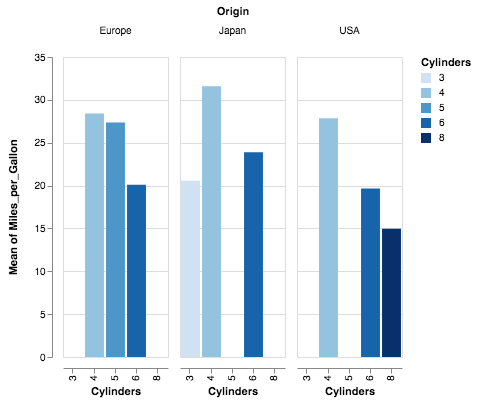

In [9]:
alt.Chart(cars).mark_bar().encode(
    column='Origin:N',
    y='mean(Miles_per_Gallon)',
    color=alt.Color('Cylinders:O'),
    x='Cylinders:O',
    tooltip='count()'
)

## Use *selection* objects to link data between plots

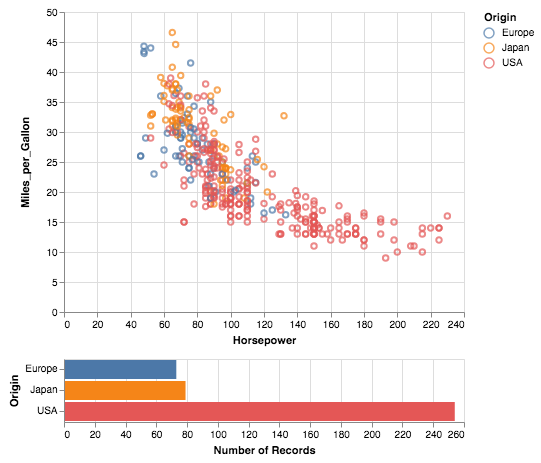

In [10]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

alt.vconcat(points, bars, data=cars)

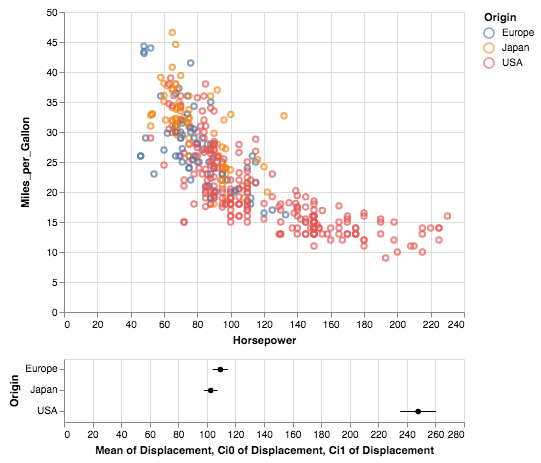

In [11]:
brush = alt.selection(type='interval')

points1 = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

points2 = alt.Chart().mark_circle().encode(
    x='mean(Displacement)',
    y='Origin',
    color=alt.value('black'),
    tooltip='count()'
).transform_filter(
    brush
)

#ci0/ci1 are lower/upper bound of 95% bootstrapped estimate of mean
error_bars = alt.Chart().mark_rule().encode(
    x='ci0(Displacement)', 
    x2='ci1(Displacement)',
    y='Origin'
).transform_filter(
    brush
)

alt.vconcat(points1, points2 + error_bars, data=cars)